# Predicting Kudos from Strava Activities History

Strava is the most popular social network app for people who cycle or do triathon or running or any combination of them.
For me, is the social media that I use the most and it tracks my activities in Running, Cycling, Swimming and others like walking and even people record gym workout, which I never did.

99% of my activities are cycling which is the sport I do the most, but I did some swimming and running as once I did some triatlon training.

As any social media app, people are able to give kudos in activities, but different from other social media platforms, you are not allowed to give yourself kudos, which makes totally sense. Hello FB?

One big motivation for athletes is to receive kudos specially if you go the extra mile and do a long activity.

I have been taking data science as a career more seriously in the last 3 months when I decided to learn python for data science properly and the main packages and part of my learning I am practicing as much as possible to retain and improve what I have learned so far. My intention is to learn and get better and solve more and more challenging problems with data analysis and machine learning.

As part of this exercise, in this notebook I will analyse my strava feed from the last 3 years and build a regression model to predict how many kudos an activity would receive based on the statistics recorded.

I am not getting activity stream data for this purpuse but only the summary activity statistics.

If you wanted to understand how to do this I have this <a href="https://github.com/pedrojunqueira/ML-Practice/blob/master/Strava%20Data%20Analysis.ipynb">ipython notebook</a> where I go step by step on how to do it.



I already downloaded and saved as a csv file which I will use for this notebook

# Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant:

- Load Data
- Data cleaning and formatting
- Exploratory data analysis 
- Feature engineering and selection
- Establish a baseline and compare several machine learning models on a performance metric
- Perform hyperparameter tuning on the best model to optimize it for the problem
- Evaluate the best model on the testing set
- Interpret the model results to the extent possible
- Draw conclusions 

Setting up the structure of the pipeline ahead of time lets us see how one step flows into the other. However, the machine learning pipeline is an iterative procedure and so we don't always follow these steps in a linear fashion. We may revisit a previous step based on results from further down the pipeline. For example, while we may perform feature selection before building any models, we may use the modeling results to go back and select a different set of features. Or, the modeling may turn up unexpected results that mean we want to explore our data from another angle. Generally, you have to complete one step before moving on to the next, but don't feel like once you have finished one step the first time, you cannot go back and make improvements!

I try to focus more on the implementations of the methods rather than explaining them at a low-level, but have provided resources for those who want to go deeper. For the single best book (in my opinion) for learning the basics and implementing machine learning practices in Python, check out Hands-On Machine Learning with Scikit-Learn and Tensorflow by Aurelion Geron.



# Load Data

As mentioned above you can find <a href="https://github.com/pedrojunqueira/ML-Practice/blob/master/Strava%20Data%20Analysis.ipynb">here</a> in detail how the data was imported from strava



for this exercise I am loading the file from the working directory where this notebook is


In [1]:
# import packages to use in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import seaborn as sns


In [2]:
# load file
os.getcwd()

'/Users/pedrojunqueira/Google Drive/Documents/#18 DataMaster/Jupyter Projects'

In [3]:
ride = pd.read_csv(f'{os.getcwd()}/strava_data.csv')

# Data cleaning and formatting 

The goal in this step is to make sure the data is machine learning ready, there is no nulls, the features are in the right numeric format for analysis and modelling

In [4]:
# only analysing rides so drop all runs imported 
ride = ride[ride['type']=="Ride"]

In [5]:
# df dimension
ride.shape

(1036, 40)

In [6]:
ride.tail()

,Unnamed: 0,id,external_id,upload_id,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,...,workout_type,average_speed,max_speed,has_kudoed,gear_id,kilojoules,average_watts,device_watts,max_watts,weighted_average_watts
1086,1086,2499341454,garmin_push_3806613793,2.654715e+09,{'id': 8583263},Morning Ride,10283.8,1652,1942,26.0,...,NaN,6.225,9.9,False,b3900175,115.7,70.0,False,NaN,NaN
1087,1087,2500152952,garmin_push_3807545540,2.655548e+09,{'id': 8583263},Afternoon Ride,9826.1,1742,2034,42.0,...,NaN,5.641,9.8,False,b3900175,139.7,80.2,False,NaN,NaN
1088,1088,2507262227,garmin_push_3815882396,2.662830e+09,{'id': 8583263},Morning Ride,39854.6,8053,9362,621.0,...,NaN,4.949,16.1,False,b3900175,820.5,101.9,False,NaN,NaN
1089,1089,2532931516,garmin_push_3845982255,2.689061e+09,{'id': 8583263},Morning Ride,10274.9,1689,2213,27.0,...,NaN,6.083,9.2,False,b3900175,114.0,67.5,False,NaN,NaN
1090,1090,2533486678,garmin_push_3846715423,2.689640e+09,{'id': 8583263},Afternoon Ride,9853.7,1675,1764,45.0,...,NaN,5.883,10.3,False,b3900175,112.9,67.4,False,NaN,NaN


In [7]:
# Check 1 ride detail
ride.iloc[1035,:]

Unnamed: 0                                                             1090
id                                                               2533486678
external_id                                          garmin_push_3846715423
upload_id                                                       2.68964e+09
athlete                                                     {'id': 8583263}
name                                                         Afternoon Ride
distance                                                             9853.7
moving_time                                                            1675
elapsed_time                                                           1764
total_elevation_gain                                                     45
elev_high                                                              -500
elev_low                                                               -500
type                                                                   Ride
start_date  

In [8]:
# feature information
ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1090
Data columns (total 40 columns):
Unnamed: 0                1036 non-null int64
id                        1036 non-null int64
external_id               1036 non-null object
upload_id                 1036 non-null float64
athlete                   1036 non-null object
name                      1036 non-null object
distance                  1036 non-null float64
moving_time               1036 non-null int64
elapsed_time              1036 non-null int64
total_elevation_gain      1036 non-null float64
elev_high                 1036 non-null float64
elev_low                  1036 non-null float64
type                      1036 non-null object
start_date                1036 non-null object
start_date_local          1036 non-null object
timezone                  1036 non-null object
start_latlng              1036 non-null object
end_latlng                1036 non-null object
achievement_count         1036 non-null int64


In [9]:
#check columns names
ride.columns

Index(['Unnamed: 0', 'id', 'external_id', 'upload_id', 'athlete', 'name',
       'distance', 'moving_time', 'elapsed_time', 'total_elevation_gain',
       'elev_high', 'elev_low', 'type', 'start_date', 'start_date_local',
       'timezone', 'start_latlng', 'end_latlng', 'achievement_count',
       'kudos_count', 'comment_count', 'athlete_count', 'photo_count',
       'total_photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'flagged', 'workout_type', 'average_speed', 'max_speed', 'has_kudoed',
       'gear_id', 'kilojoules', 'average_watts', 'device_watts', 'max_watts',
       'weighted_average_watts'],
      dtype='object')

Check for missing values

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(ride)

Your selected dataframe has 40 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
max_watts,1036,100.0
weighted_average_watts,1036,100.0
workout_type,458,44.2
gear_id,317,30.6
kilojoules,3,0.3
average_watts,3,0.3


Not too bad for a start. Good when there is a device and system that collects data automatically and systematically.

In [12]:
#drop not usefull columns
# ids, booleans, objects and etc no data 
ride.drop(columns=['Unnamed: 0','id', 'external_id', 'upload_id','name', 'athlete','map', 'trainer', 'commute', 'manual', 'private',
       'flagged','device_watts','has_kudoed','max_watts',
       'weighted_average_watts','gear_id' ,'type','workout_type','photo_count'],axis=1,inplace=True)



In [13]:
# check what is left
ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1090
Data columns (total 20 columns):
distance                1036 non-null float64
moving_time             1036 non-null int64
elapsed_time            1036 non-null int64
total_elevation_gain    1036 non-null float64
elev_high               1036 non-null float64
elev_low                1036 non-null float64
start_date              1036 non-null object
start_date_local        1036 non-null object
timezone                1036 non-null object
start_latlng            1036 non-null object
end_latlng              1036 non-null object
achievement_count       1036 non-null int64
kudos_count             1036 non-null int64
comment_count           1036 non-null int64
athlete_count           1036 non-null int64
total_photo_count       1036 non-null int64
average_speed           1036 non-null float64
max_speed               1036 non-null float64
kilojoules              1033 non-null float64
average_watts           1033 non-null 

In [14]:
# check the object columns which is text and will be hard to sort e.g dates as a string does not make sense
ride.iloc[:,6:11].head()

,start_date,start_date_local,timezone,start_latlng,end_latlng
0,2015-04-08 07:12:04+00:00,2015-04-08 16:42:04+00:00,(GMT+09:30) Australia/Adelaide,"[-34.94, 138.6]","[-34.93, 138.6]"
1,2015-04-21 07:46:30+00:00,2015-04-21 17:16:30+00:00,(GMT+09:30) Australia/Adelaide,"[-34.93, 138.6]","[-34.88, 138.63]"
2,2015-04-21 22:02:34+00:00,2015-04-22 07:32:34+00:00,(GMT+09:30) Australia/Adelaide,"[-34.88, 138.63]","[-34.94, 138.6]"
4,2015-04-22 07:41:52+00:00,2015-04-22 17:11:52+00:00,(GMT+09:30) Australia/Adelaide,"[-34.93, 138.6]","[-34.88, 138.63]"
5,2015-04-22 21:51:09+00:00,2015-04-23 07:21:09+00:00,(GMT+09:30) Australia/Adelaide,"[-34.88, 138.63]","[-34.94, 138.6]"


In [15]:
# transform to date time
ride['start_date']= ride['start_date'].apply(lambda x: datetime.strptime(x[0:19],'%Y-%m-%d %X'))

In [16]:
ride['start_date_local']= ride['start_date_local'].apply(lambda x: datetime.strptime(x[0:19],'%Y-%m-%d %X'))

In [17]:
# create a city atribute
ride['city']= ride['timezone'].apply(lambda x: x.split('/')[-1])

In [18]:
# expand Lat and Lon for start
s_lat_lon = ride['start_latlng'].str.split(',',expand=True).rename(index=int, columns={0: "s_lat", 1: "s_lon"})

In [19]:
# expand Lat and Lon for end
e_lat_lon = ride['end_latlng'].str.split(',',expand=True).rename(index=int, columns={0: "e_lat", 1: "e_lon"})


In [20]:
#Add to the main frame
ride =pd.concat([ride,s_lat_lon],axis=1)

In [21]:
#Add to the main frame
ride =pd.concat([ride,e_lat_lon],axis=1)

In [22]:
# drop original columns
ride.drop(columns=['start_latlng','end_latlng','timezone'],axis=1,inplace=True)

In [23]:
# Check data frame
ride.head()

,distance,moving_time,elapsed_time,total_elevation_gain,elev_high,elev_low,start_date,start_date_local,achievement_count,kudos_count,...,total_photo_count,average_speed,max_speed,kilojoules,average_watts,city,s_lat,s_lon,e_lat,e_lon
0,9789.1,1898,2057,27.1,61.3,30.4,2015-04-08 07:12:04,2015-04-08 16:42:04,0,0,...,0,5.158,10.3,NaN,NaN,Adelaide,[-34.94,138.6],[-34.93,138.6]
1,9967.4,1840,2120,33.1,61.0,30.4,2015-04-21 07:46:30,2015-04-21 17:16:30,0,0,...,0,5.417,15.2,NaN,NaN,Adelaide,[-34.93,138.6],[-34.88,138.63]
2,10022.0,1763,1958,27.2,61.3,29.7,2015-04-21 22:02:34,2015-04-22 07:32:34,13,0,...,0,5.685,15.6,NaN,NaN,Adelaide,[-34.88,138.63],[-34.94,138.6]
4,9969.3,1859,2017,46.1,61.0,30.4,2015-04-22 07:41:52,2015-04-22 17:11:52,7,0,...,0,5.363,14.9,187.0,100.6,Adelaide,[-34.93,138.6],[-34.88,138.63]
5,9966.0,1660,1763,26.8,61.3,30.1,2015-04-22 21:51:09,2015-04-23 07:21:09,13,0,...,0,6.004,15.5,176.9,106.6,Adelaide,[-34.88,138.63],[-34.94,138.6]


In [24]:
#fix the lat lon columns 
#remove de [] from lat lon and convert to float
ride['s_lat'] = ride['s_lat'].str.replace('[','').astype(float)
ride['e_lat'] = ride['e_lat'].str.replace('[','').astype(float)
ride['s_lon'] = ride['s_lon'].str.replace(']','').astype(float)
ride['e_lon'] = ride['e_lon'].str.replace(']','').astype(float)

In [25]:
# check if all numeric
ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1090
Data columns (total 22 columns):
distance                1036 non-null float64
moving_time             1036 non-null int64
elapsed_time            1036 non-null int64
total_elevation_gain    1036 non-null float64
elev_high               1036 non-null float64
elev_low                1036 non-null float64
start_date              1036 non-null datetime64[ns]
start_date_local        1036 non-null datetime64[ns]
achievement_count       1036 non-null int64
kudos_count             1036 non-null int64
comment_count           1036 non-null int64
athlete_count           1036 non-null int64
total_photo_count       1036 non-null int64
average_speed           1036 non-null float64
max_speed               1036 non-null float64
kilojoules              1033 non-null float64
average_watts           1033 non-null float64
city                    1036 non-null object
s_lat                   1036 non-null float64
s_lon               

In [26]:
#Check head
ride.head()

,distance,moving_time,elapsed_time,total_elevation_gain,elev_high,elev_low,start_date,start_date_local,achievement_count,kudos_count,...,total_photo_count,average_speed,max_speed,kilojoules,average_watts,city,s_lat,s_lon,e_lat,e_lon
0,9789.1,1898,2057,27.1,61.3,30.4,2015-04-08 07:12:04,2015-04-08 16:42:04,0,0,...,0,5.158,10.3,NaN,NaN,Adelaide,-34.94,138.60,-34.93,138.60
1,9967.4,1840,2120,33.1,61.0,30.4,2015-04-21 07:46:30,2015-04-21 17:16:30,0,0,...,0,5.417,15.2,NaN,NaN,Adelaide,-34.93,138.60,-34.88,138.63
2,10022.0,1763,1958,27.2,61.3,29.7,2015-04-21 22:02:34,2015-04-22 07:32:34,13,0,...,0,5.685,15.6,NaN,NaN,Adelaide,-34.88,138.63,-34.94,138.60
4,9969.3,1859,2017,46.1,61.0,30.4,2015-04-22 07:41:52,2015-04-22 17:11:52,7,0,...,0,5.363,14.9,187.0,100.6,Adelaide,-34.93,138.60,-34.88,138.63
5,9966.0,1660,1763,26.8,61.3,30.1,2015-04-22 21:51:09,2015-04-23 07:21:09,13,0,...,0,6.004,15.5,176.9,106.6,Adelaide,-34.88,138.63,-34.94,138.60


In [27]:
# ckeck final null values
ride.isna().sum()

distance                0
moving_time             0
elapsed_time            0
total_elevation_gain    0
elev_high               0
elev_low                0
start_date              0
start_date_local        0
achievement_count       0
kudos_count             0
comment_count           0
athlete_count           0
total_photo_count       0
average_speed           0
max_speed               0
kilojoules              3
average_watts           3
city                    0
s_lat                   0
s_lon                   0
e_lat                   0
e_lon                   0
dtype: int64

In [28]:
# only 3 value. will replace with with average
ride = ride.fillna(ride.mean())


In [29]:
# no values nulls
ride.isna().sum()

distance                0
moving_time             0
elapsed_time            0
total_elevation_gain    0
elev_high               0
elev_low                0
start_date              0
start_date_local        0
achievement_count       0
kudos_count             0
comment_count           0
athlete_count           0
total_photo_count       0
average_speed           0
max_speed               0
kilojoules              0
average_watts           0
city                    0
s_lat                   0
s_lon                   0
e_lat                   0
e_lon                   0
dtype: int64

In [30]:
# final look at columns
ride.describe()

,distance,moving_time,elapsed_time,total_elevation_gain,elev_high,elev_low,achievement_count,kudos_count,comment_count,athlete_count,total_photo_count,average_speed,max_speed,kilojoules,average_watts,s_lat,s_lon,e_lat,e_lon
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,18523.248069,3213.654440,4865.534749,210.462934,192.280309,30.921042,6.383205,8.470077,0.613900,1.364865,0.397683,5.869324,12.591795,352.074347,100.662246,-34.865608,138.078108,-34.867143,138.076959
std,19270.626010,3431.533545,7161.073076,379.083973,262.566377,39.336684,15.079079,8.857873,1.741663,1.223001,1.118209,0.640426,2.962030,434.907127,22.919986,0.698448,10.221248,0.698964,10.221707
min,0.000000,0.000000,0.000000,0.000000,-500.000000,-500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.750000,-51.420000,-37.750000,-51.420000
25%,9682.125000,1541.000000,1766.750000,29.000000,56.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.544000,10.400000,135.275000,83.075000,-34.920000,138.590000,-34.920000,138.580000
50%,10070.400000,1724.000000,1986.000000,43.750000,74.300000,30.000000,1.000000,7.000000,0.000000,1.000000,0.000000,5.880000,11.700000,168.600000,101.250000,-34.880000,138.630000,-34.880000,138.630000
75%,20030.875000,3297.500000,5350.250000,99.250000,189.000000,38.450000,4.000000,12.000000,0.000000,1.000000,0.000000,6.225000,14.800000,286.600000,118.200000,-34.880000,138.630000,-34.880000,138.630000
max,176743.000000,29307.000000,46574.000000,3593.000000,2583.800000,400.000000,134.000000,40.000000,17.000000,23.000000,7.000000,8.022000,36.200000,3608.500000,161.600000,-22.130000,145.700000,-22.120000,145.700000


So far I am happy with the data cleanning and we are at the stage data can be analysed and there is no missing value and all columns are numeric. Except for City which will deal with this later.

# Exploratory data analysis

Always wanted to predict number of kudos from my ride and understand what influences it.

What I noticed is that I do not received much kudos untill started to have more friends and also when I stsrted to give kudos as psycology explains the <a href="https://www.aqr.org.uk/glossary/reciprocity-bias">reciprocity bias.</a> 

Lets analyse all the features and identify the main patters and the features that has the highest correlation to target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bd907b8>,
      dtype=object)

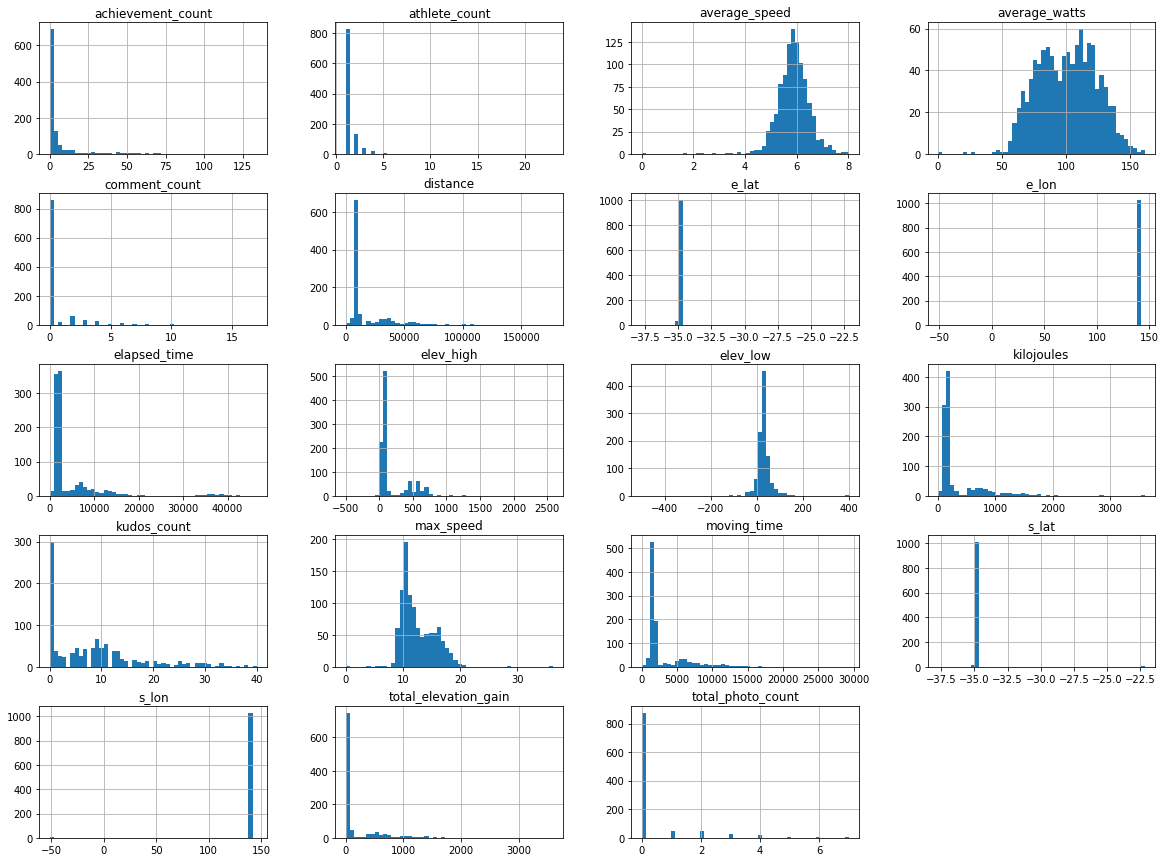

In [31]:
#Analyse histogram of all variables

ride.hist(bins=50,figsize=(20,15))

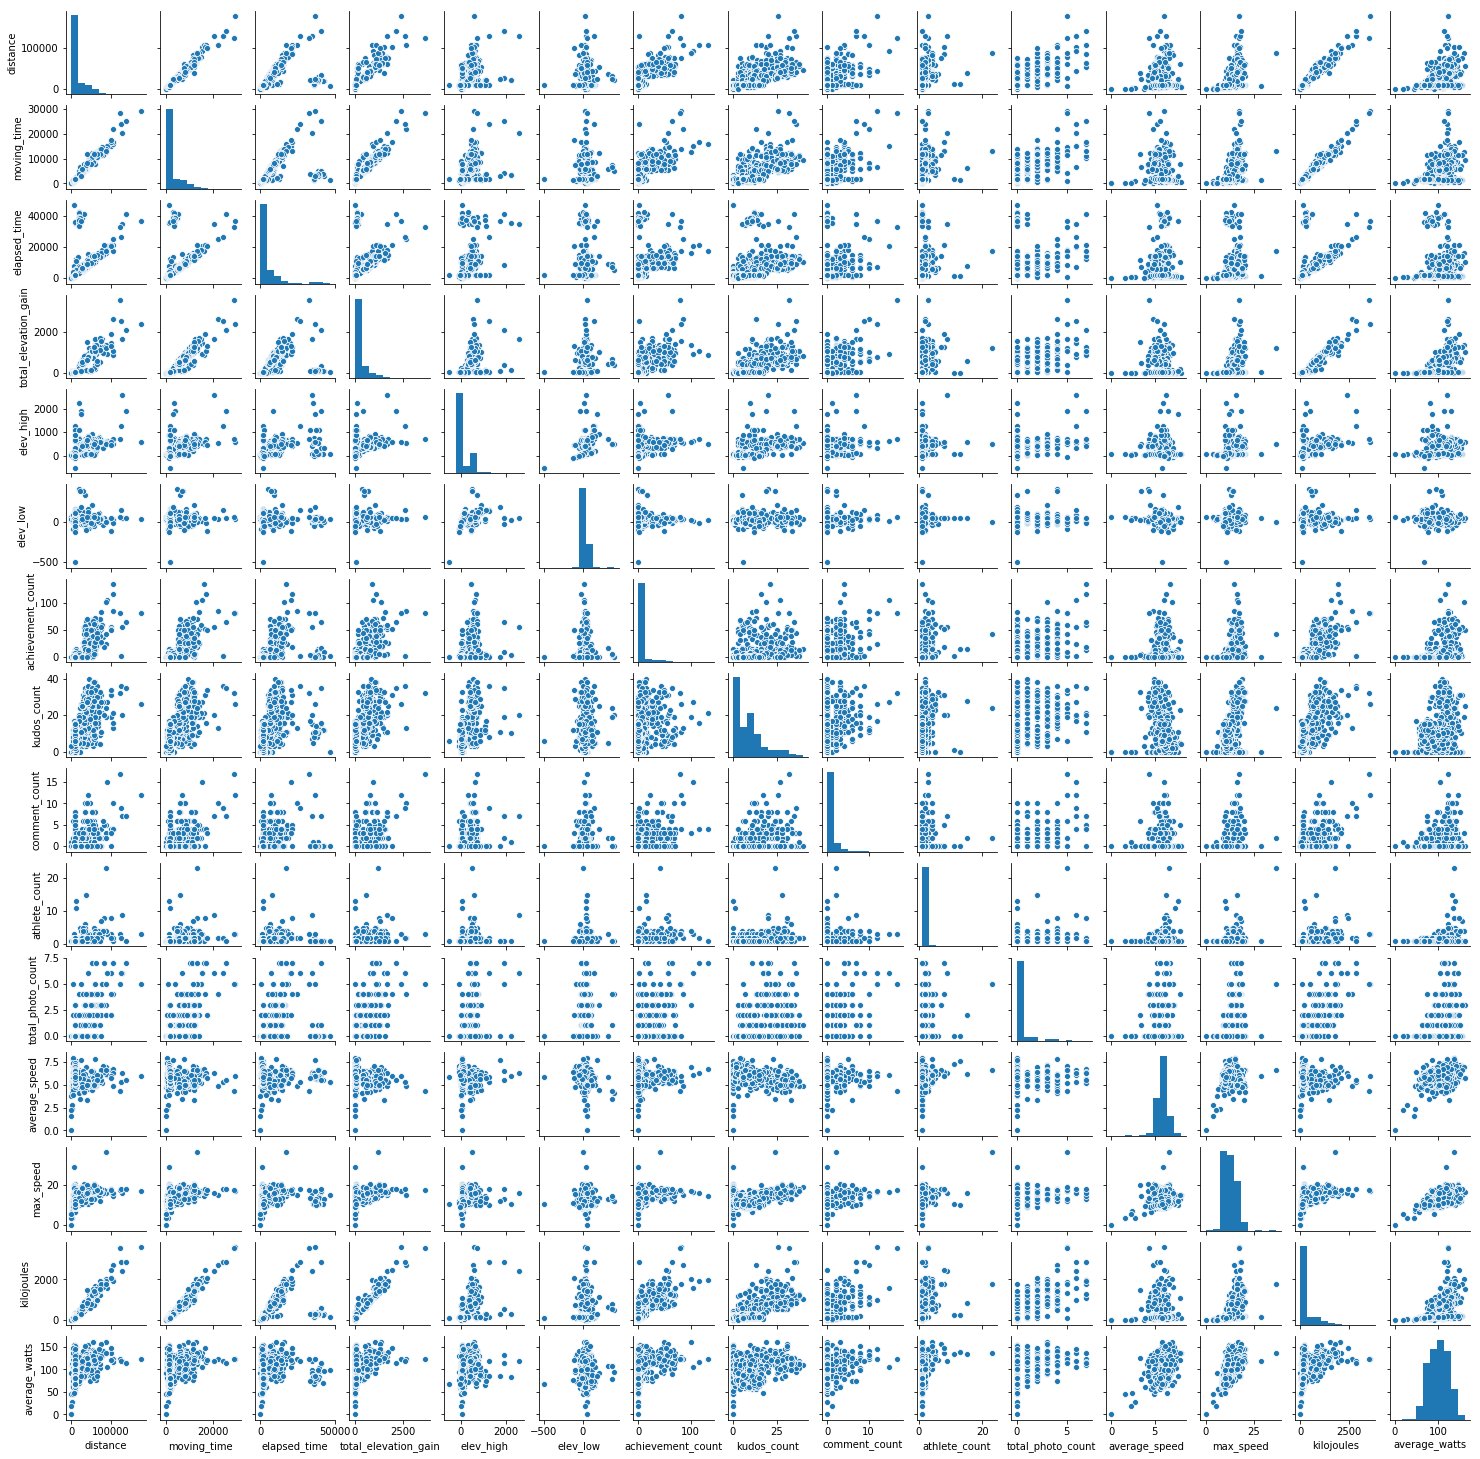

In [32]:
# Plotting Scatter Matrix
# just numeric excluding latitude and city
g=sns.pairplot(data=ride.iloc[:,:-5]);
g.fig.set_size_inches(20,20)


In [33]:
#Correlation against kudos
ride.corr()['kudos_count'].sort_values(ascending=False)[1:]

moving_time             0.678485
distance                0.671055
total_elevation_gain    0.669347
kilojoules              0.653669
elev_high               0.608064
total_photo_count       0.486296
elapsed_time            0.414154
comment_count           0.387479
athlete_count           0.346432
max_speed               0.344128
achievement_count       0.340836
average_watts           0.142078
elev_low                0.123802
e_lat                   0.063937
s_lat                   0.063805
average_speed          -0.057468
e_lon                  -0.072314
s_lon                  -0.072423
Name: kudos_count, dtype: float64

Will drop comments as it leaks information as commends only happens when a ride is complete and is not input to predict kudos. However correlation does not suggest as people not always comment.

In [34]:
ride.drop(['comment_count'],axis=1,inplace=True)

As I explained above kudos is a relation of friendship so the more friends you have more kudos.

If you uploaded a ride on strava and no one saw it, did it really happened? 🤔

So let's have a look at my kudos for every ride over time

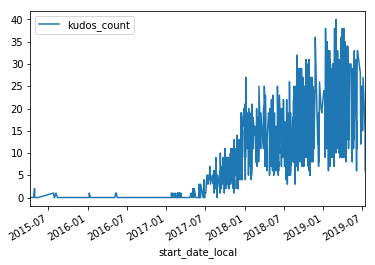

In [35]:
# visualise kudos overtime

pd.pivot_table(ride,values='kudos_count',index='start_date_local',aggfunc=np.mean).sort_index().plot()

Looks like no one cared about kudos or I did not have enough good friends or a supporting cycling community before mid 2017. For this analysis then, let's drop the rides before June 2017

In [36]:
ride.shape # before dropping rows

(1036, 21)

In [37]:
ride = ride[ride['start_date_local'] > datetime(2017,6,1)]

In [38]:
ride.shape # 30% dataset reduced

(726, 21)

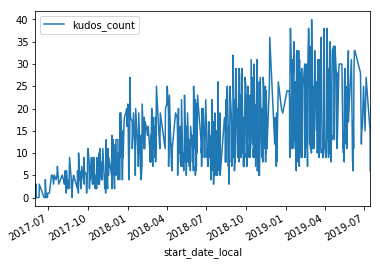

In [39]:
# plot again
pd.pivot_table(ride,values='kudos_count',index='start_date_local',aggfunc=np.mean).sort_index().plot()

my theory is that kudos is a function of popularity and also number of people following me and also a question of reciprocity. I mean if you give lots of kudos you tend to receive lots of kudos as well. 2017 was the year I really started to get into cycling more regularly and built a coommunity around friends and socialising.

It is possible to retrieve in strava current static number of friends but there is not historical information of number of friends and how it changed overtime. If had this data would be great feature. I believe a strong correlated one to rides.

Now I Would like to check correlation matrix and pair plot again to check if much changed, since we are looking at a time where I did considerable more riding and longer rides and has much more friends connected.

In [40]:
ride.corr().loc[:,'kudos_count'].sort_values(ascending=False)[1:]

max_speed               0.671372
moving_time             0.649704
kilojoules              0.642188
total_elevation_gain    0.640533
distance                0.630972
elev_high               0.554540
total_photo_count       0.448001
average_watts           0.426941
athlete_count           0.383186
elapsed_time            0.346847
achievement_count       0.280704
elev_low                0.138349
s_lat                   0.053755
e_lat                   0.052983
e_lon                  -0.065148
s_lon                  -0.065226
average_speed          -0.347719
Name: kudos_count, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Plot')

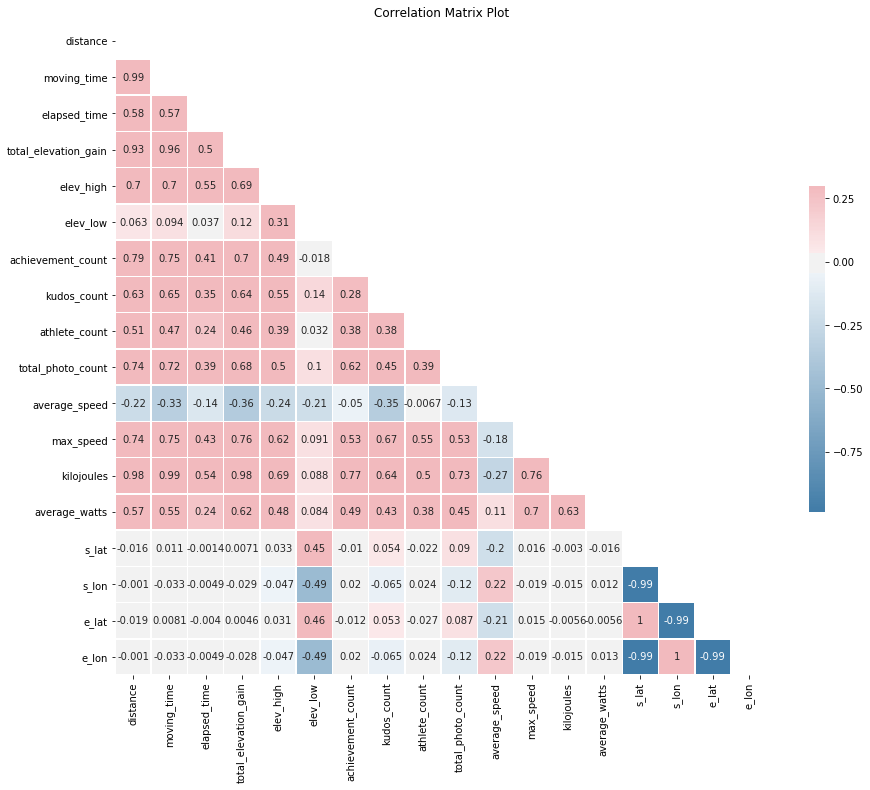

In [41]:
corr = ride.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Plot')

Everything raise a bit and some droped and some moved significantly like max speed. Now lets plot again scatter matrix and check for potential drops or stay with those variables to train the model.

Regarding correlation now the strongest one is max_speed with 0.67.

Geographical coordinates there is no correlation. Close to zero.

Average speed is negatively correlated but not very strong.

Elevation low is weekly correlated.


In [42]:
selected_columns = ride.loc[:,['max_speed',              
'moving_time',             
'kilojoules',     
'total_elevation_gain',    
'distance',
'elev_high',
'total_photo_count',
'average_watts',
'athlete_count','kudos_count']]      

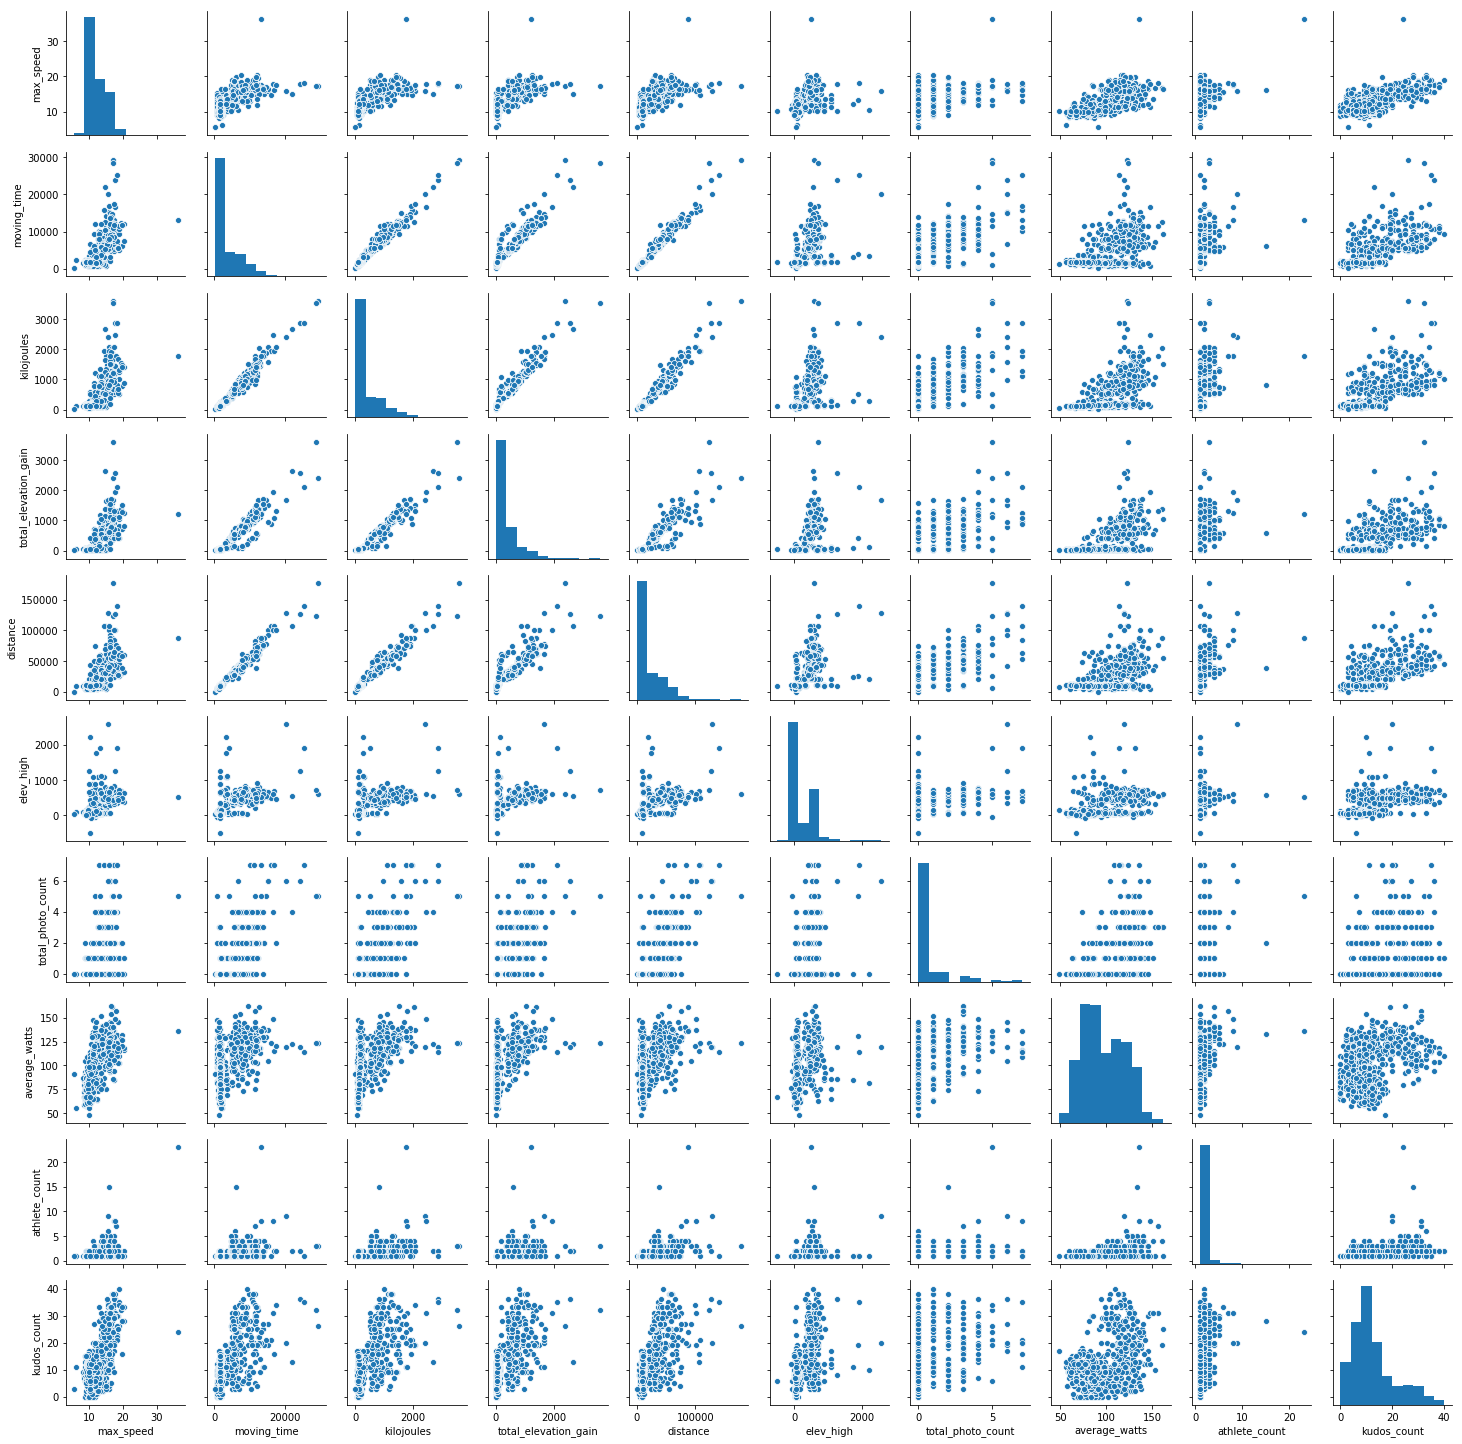

In [43]:
# pair plot the non correlated and in order of importance
g=sns.pairplot(data=selected_columns);
g.fig.set_size_inches(20,20)

# Elimininate features that are very close to each other

Potentially I could drop distance which is very correlated to moving time but less related to kudos count.

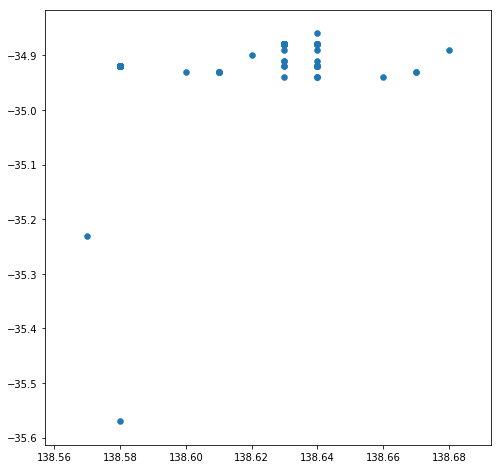

In [44]:
# plot geographical data
# only adelaide
fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
data = ride[ride['city']=='Adelaide']
plt.scatter(y=data['e_lat'],x=data['e_lon'])
#ride[ride['city']=='Adelaide'].plot(kind='scatter',y='s_lat',x='s_lon',c='moving_time')


Does not explain or say much about the data or kudos.

Not much pattern can be seen here.

My cycling habits are very stable and this plot show the pattern of me commuting to work and going for my rides to the Adelaide Hills on the weekends

My work is to the west and hills is to the east.
My house and city cafes are in the middle.

#  Feature engineering and selection

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:

Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:

* Feature Engineering: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as scalling variables or dummy variables for categorical data, so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.

* Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.
    
Feature engineering and selection are iterative processes that will usually require several attempts to get right.

Feature engineering and selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn!

In this project, we will take the following steps for feature engineering:

- Standard Scale features for better training
- Create dummy variables for categorical (city)

For feature selection, we will do the following:

- Drop all not relevant features we already identified in correlation analysis and cleaning
- Remove non important features (done later with the random forest model)

Let's get started


reference: Template addaped from <a href=https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb>from</a>

In [45]:
# check all current selected variables
ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 330 to 1090
Data columns (total 21 columns):
distance                726 non-null float64
moving_time             726 non-null int64
elapsed_time            726 non-null int64
total_elevation_gain    726 non-null float64
elev_high               726 non-null float64
elev_low                726 non-null float64
start_date              726 non-null datetime64[ns]
start_date_local        726 non-null datetime64[ns]
achievement_count       726 non-null int64
kudos_count             726 non-null int64
athlete_count           726 non-null int64
total_photo_count       726 non-null int64
average_speed           726 non-null float64
max_speed               726 non-null float64
kilojoules              726 non-null float64
average_watts           726 non-null float64
city                    726 non-null object
s_lat                   726 non-null float64
s_lon                   726 non-null float64
e_lat                   726 non-null

Lets first

 - drop coordinates and time rows
 - create city dummy variables
 - Split test and trainset
 - Scale variables


In [46]:
ride.drop(columns=['e_lon','e_lat','s_lat','s_lon','start_date','start_date_local'],axis=1,inplace=True)

In [47]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 330 to 1090
Data columns (total 15 columns):
distance                726 non-null float64
moving_time             726 non-null int64
elapsed_time            726 non-null int64
total_elevation_gain    726 non-null float64
elev_high               726 non-null float64
elev_low                726 non-null float64
achievement_count       726 non-null int64
kudos_count             726 non-null int64
athlete_count           726 non-null int64
total_photo_count       726 non-null int64
average_speed           726 non-null float64
max_speed               726 non-null float64
kilojoules              726 non-null float64
average_watts           726 non-null float64
city                    726 non-null object
dtypes: float64(8), int64(6), object(1)
memory usage: 110.8+ KB


In [48]:
ride = pd.concat([ride,pd.get_dummies(ride['city'])],axis=1)


In [49]:
ride.drop('city',axis=1,inplace=True)

In [123]:
# split sets
from sklearn.model_selection import train_test_split
X = ride.drop('kudos_count',axis=1).values
y = ride['kudos_count'].values

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [125]:
print(len(X_train)+len(X_test))

726


In [126]:
# feature scalling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


The first one the error was quite high and the last 2 were not far off if you round them
lets calculate mean squared error for the training and test set

# Establish a baseline 

Now it is important to starting evaluating the metric with all features and stablish a baseline for analysis of the results and then do some more feature engineering as well as hyperparameter tunning

for a regression model the performance metris is rmse <a href="https://en.wikipedia.org/wiki/Root-mean-square_deviation">(root mean squared error)</a>



Lets calculate it for a non regularised plain Linear Regression first and calculate rmse for train and test

<a href="https://en.wikipedia.org/wiki/Regularization_(mathematics)">Regularization reference</a> 
                          

In [127]:
# train model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
# select 3 first elements of train set
some_data = X_train_std[:3]
some_predictions = lr.predict(some_data)
some_labels = y_train[:3]
print(f'some predictions{some_predictions} and some labels{some_labels}')

some predictions[ 3.59785842 11.31043196 33.96223287] and some labels[ 9  9 31]


The first was far but second and thrid not too bad

In [129]:
# calculate rmse
from sklearn.metrics import mean_squared_error
kudos_predictions_train = lr.predict(X_train_std)
kudos_predictions_test = lr.predict(X_test_std)
train_mse_lr = mean_squared_error(y_train,kudos_predictions_train)
train_rmse_lr = np.sqrt(train_mse_lr)



In [130]:
print(f'mse train {train_mse_lr:.2f}')
print(f'rmse train {train_rmse_lr:.2f}')

mse train 22.85
rmse train 4.78


Lets set it as the baseline to improve the model



Not too bad but the model looks a bit overfit. On the train set we get Kudos right within aproximate 5 kudos.

Before we touch the training set for validation we can use the sklearn cross validation function. This function is a great way to validate the model without touching the training set until we are confident we have a good model.

What Cross Validation does is split the train set in k folds, usually 10 and train in k-1 fold and validate(test) on the reminder fold and loop though all combination without replacement. 
Sklearn calculate the metric you chose e.g. mse then it is possible to calculate the average and std deviation to evaluate the model and if it is overfit.

In [131]:
# Cross validation code
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
lr_rmse_scores = np.sqrt(-scores)



In [132]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviarion: ', scores.std())

In [133]:
# mse Scores
display_scores(scores)

#rmse Scores
display_scores(lr_rmse_scores)

Scores:  [-20.98609592 -18.4280358  -24.39273241 -21.73276014 -23.46016024
 -44.17327531 -24.13379802 -38.59647478 -13.1678552  -32.5478176 ]
Mean:  -26.161900540851654
Standard deviarion:  8.99674867498635
Scores:  [4.58105838 4.29278881 4.93889992 4.66184085 4.84356896 6.64629787
 4.91261621 6.21260612 3.62875395 5.70506946]
Mean:  5.042350052906874
Standard deviarion:  0.858257819540077


rmse is slighly worse which shows that is not too overfit.

One way to pick a good model is to quickly train other models and then compare the rmse with the baseline of the plain Linear regression model.

Other two options are decision trees and random forest

Lets fit them and validate on the training set

In [134]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_std,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [135]:
kudos_predictions_train_tree = tree.predict(X_train_std)
kudos_predictions_test_tree = tree.predict(X_test_std)
train_mse_tree = mean_squared_error(y_train,kudos_predictions_train_tree)
train_rmse_tree = np.sqrt(train_mse_tree)


In [63]:
print(f'mse train {train_mse_tree:.2f}')
print(f'rmse train {train_rmse_tree:.2f}')

mse train 24.32
rmse train 4.93


In [136]:
# Cross Validation tree

scores = cross_val_score(tree, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [137]:
# mse Scores
display_scores(scores)

#rmse Scores
display_scores(tree_rmse_scores)

Scores:  [-21.81827982 -20.87214347 -26.08033268 -33.10591927 -27.44420664
 -36.93781786 -38.0992251  -36.55664792 -17.90643164 -32.2532549 ]
Mean:  -29.107425929576305
Standard deviarion:  6.941800779792999
Scores:  [4.67100416 4.56860411 5.10689071 5.75377435 5.23872185 6.07764904
 6.17245697 6.04620938 4.23159918 5.67919492]
Mean:  5.354610466562555
Standard deviarion:  0.6599793034293181


In [138]:
# random forest  regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train_std,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [139]:
kudos_predictions_train_forest = forest.predict(X_train_std)
kudos_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,kudos_predictions_train_forest)
train_rmse_forest = np.sqrt(train_mse_forest)


In [140]:
print(f'mse train {train_mse_forest:.2f}')
print(f'rmse train {train_rmse_forest:.2f}')

mse train 2.62
rmse train 1.62


In [69]:
# Cross Validation Forest

scores = cross_val_score(forest, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [70]:
# mse Scores
display_scores(scores)

#rmse Scores
display_scores(forest_rmse_scores)

Scores:  [-16.48644    -19.08468053 -19.41991976 -22.55396433 -24.7927431
 -22.93584725 -22.01547288 -22.68957608 -13.48583402 -22.14728428]
Mean:  -20.561176224117645
Standard deviarion:  3.268389161042774
Scores:  [4.06034974 4.36860167 4.4068038  4.74910142 4.97923118 4.78913847
 4.69206488 4.76335765 3.67230636 4.70609013]
Mean:  4.518704529732488
Standard deviarion:  0.37747264416477183


Out of those 3 models the one that looks most overfit is Random forest

LR
rmse train: 4.78
rmse Mean CV: 5.04


Tree
rmse train: 4.93
rmse Mean CV: 5.35


RF
rmse train: 1.62
rmse Mean CV: 4.52

The LR model is not much different which suggest some degree of linearity in the data that is good for this exercise. We are on the right directions

We can now do some Hyperparameter optimisation to fine tune the most promissing model i.e. RF

For this we can use sklearn to find optimum hyperparameter trying many diferent combinations without being a tedious task

In [71]:
# getting the parameters from the first training
forest.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [99]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [100]:

print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [101]:
# do a random search first for some guidance and find best hyperoarameters
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_std, y_train)



Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.8min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [102]:
rf_random.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [113]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 10, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4],
    'n_estimators': [100, 500, 1000],
     'n_jobs': [-1]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, scoring='neg_mean_squared_error')
# fit
grid_search.fit(X_train_std,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [10, 10], 'max_features': [2, 3], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 4], 'n_estimators': [100, 500, 1000], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [114]:
# get best params
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1}

In [115]:
# get best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [116]:
cvres = grid_search.cv_results_

In [117]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

4.889404131531714 {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
4.921679327055096 {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': -1}
4.916503181027925 {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1}
4.914317367137738 {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'n_jobs': -1}
4.909548876798705 {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500, 'n_jobs': -1}
4.930598066238176 {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000, 'n_jobs': -1}
4.9666199130056805 {'bootstrap': True, 'max_depth': 10, 'max_f

In [143]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [144]:
# finally train best estimator and get the rmse for best parameter

forest = grid_search.best_estimator_
forest.fit(X_train_std,y_train)

# predict and calculate rmse
kudos_predictions_train_forest = forest.predict(X_train_std)
kudos_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,kudos_predictions_train_forest)
train_rmse_forest = np.sqrt(train_mse_forest)

print(f'mse train {train_mse_forest:.2f}')
print(f'rmse train {train_rmse_forest:.2f}')

mse train 5.49
rmse train 2.34


In the end it got a bit worse did I do anything wrong?

RF rmse train: 1.62 rmse Mean CV: 4.52

RF rmse train: 2.34 rmse Mean CV: 4.90 (below)

Let's do CV on the best estimator

In [145]:
# Cross Validation Forest with best estimator

scores = cross_val_score(forest, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

#rmse Scores
display_scores(forest_rmse_scores)


Scores:  [4.12882466 4.8329192  4.98136428 4.81915616 5.12552045 5.52495437
 5.24308769 5.72984855 3.55757428 5.11472584]
Mean:  4.905797548503463
Standard deviarion:  0.6089359754995165


for now lets set the parameter of random forest back to original and proceed with the run on test data



In [146]:
# random forest  regressor

forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train_std,y_train)

kudos_predictions_train_forest = forest.predict(X_train_std)
kudos_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,kudos_predictions_train_forest)
train_rmse_forest = np.sqrt(train_mse_forest)

print(f'mse train {train_mse_forest:.2f}')
print(f'rmse train {train_rmse_forest:.2f}')

mse train 2.62
rmse train 1.62


Lets get down to real test with test data

Now for the analysis and evaluation of the model will plot the residuals compating train and test predictions to true labels

will do with the regression, then decision tree and finally the random forest

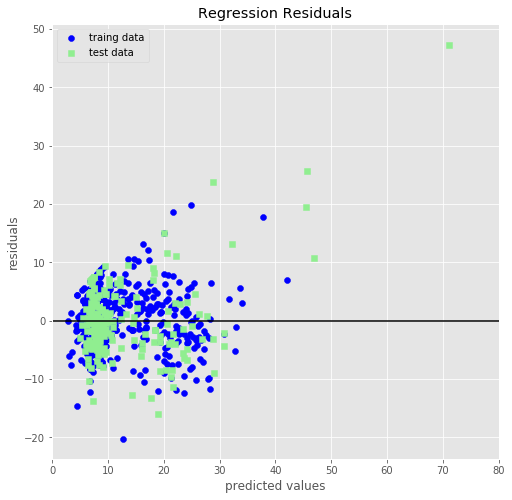

In [147]:
# Evaluate Residuals Plain Regression

fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
plt.scatter(kudos_predictions_train,kudos_predictions_train-y_train,c='blue',marker='o',label='traing data')
plt.scatter(kudos_predictions_test,kudos_predictions_test-y_test,c='lightgreen',marker='s',label='test data')
plt.title('Regression Residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=80)
plt.xlim([0,80])
plt.show()



In [148]:
# lets import another metric that in the case would be intersting analyse
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,kudos_predictions_train)
r2_test = r2_score(y_test,kudos_predictions_test)


print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')

# Also do the test evaluation of rmse

test_mse_lr = mean_squared_error(y_test,kudos_predictions_test)
test_rmse_lr = np.sqrt(test_mse_lr)

print(f'rmse train {train_rmse_lr:.2f}')
print(f'rmse test {test_rmse_lr:.2f}')



r2 train 0.67
r2 test 0.40
rmse train 4.78
rmse test 6.45


The coeficient of determination or R squared ($R^2$) is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In other words how much x is explaining y.

It normally vary from 0 to 1 being 1 the perfect explanation. 

Not too bad for train but 0.4 for test is not impressive

Now let's see how the tree based models perform on the data

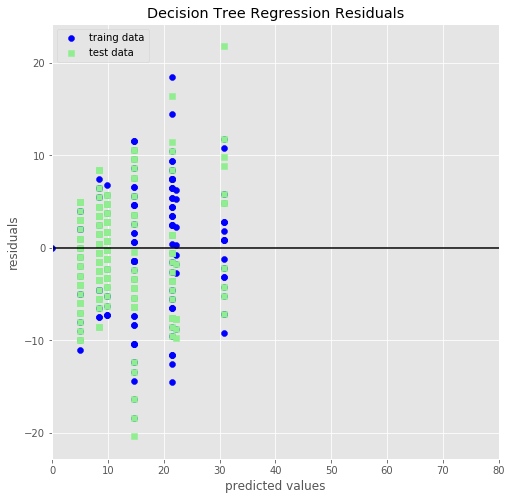

In [149]:
# Evaluate Residuals Decision Tree

fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
plt.scatter(kudos_predictions_train_tree,kudos_predictions_train_tree-y_train,c='blue',marker='o',label='traing data')
plt.scatter(kudos_predictions_test_tree,kudos_predictions_test_tree-y_test,c='lightgreen',marker='s',label='test data')
plt.title('Decision Tree Regression Residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=80)
plt.xlim([0,80])
plt.show()


Plotting the decision tree indicated that it is much better to use to predict discrete variables lets look at the test predictions. Also the model looks to be less overfit and the maximum prediciton is 30.79


In [150]:
np.max(kudos_predictions_test_tree)

30.791666666666668

In [151]:
r2_train = r2_score(y_train,kudos_predictions_train_tree)
r2_test = r2_score(y_test,kudos_predictions_test_tree)

print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')

# Also do the test evaluation of rmse

test_mse_tree = mean_squared_error(y_test,kudos_predictions_test_tree)
test_rmse_tree = np.sqrt(test_mse_tree)

print(f'rmse train {train_rmse_tree:.2f}')
print(f'rmse test {test_rmse_tree:.2f}')



r2 train 0.65
r2 test 0.55
rmse train 4.93
rmse test 5.60


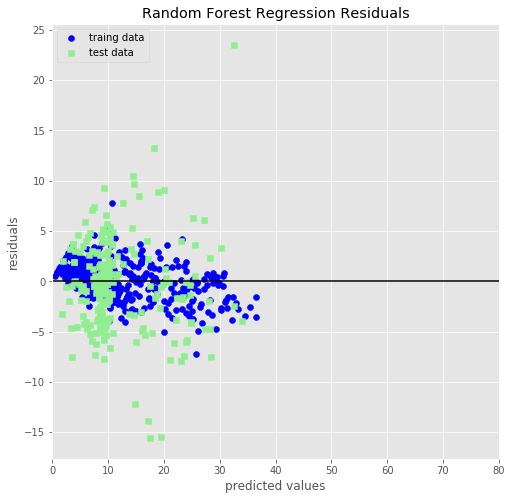

In [90]:
# Evaluate Residuals for random forest

fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
plt.scatter(kudos_predictions_train_forest,kudos_predictions_train_forest-y_train,c='blue',marker='o',label='traing data')
plt.scatter(kudos_predictions_test_forest,kudos_predictions_test_forest-y_test,c='lightgreen',marker='s',label='test data')
plt.title('Random Forest Regression Residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=80)
plt.xlim([0,80])
plt.show()


In [91]:
r2_train = r2_score(y_train,kudos_predictions_train_forest)
r2_test = r2_score(y_test,kudos_predictions_test_forest)

print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')


# Also do the test evaluation of rmse

test_mse_forest = mean_squared_error(y_test,kudos_predictions_test_forest)
test_rmse_forest = np.sqrt(test_mse_forest)

print(f'rmse train {train_rmse_forest:.2f}')
print(f'rmse test {test_rmse_forest:.2f}')


r2 train 0.96
r2 test 0.69
rmse train 1.62
rmse test 4.62


Amazing how well compared to others random forest performed. The test was better than the others training run.

the r2 was 0.96 which was great the the rmse 1.62. I would be happy with that in production data, but still the rmse test is 4.63

Let's see if we can do some feature selection and try to improve this



# Analysing feature importance

Random forest has a interesting result from its traing called  <a href="https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html">feature importance</a>



Let's dig into it

In [152]:
# evaluating feature importances
feat_labels = ride.drop('kudos_count',axis=1).columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for feature in range(X_train.shape[1]):
    print(f'{feature} - {feat_labels[indices[feature]]} {importances[indices[feature]]:.2f}')

0 - total_elevation_gain 0.34
1 - max_speed 0.15
2 - moving_time 0.09
3 - achievement_count 0.08
4 - kilojoules 0.08
5 - distance 0.06
6 - average_watts 0.05
7 - elev_low 0.04
8 - elev_high 0.04
9 - average_speed 0.03
10 - elapsed_time 0.02
11 - athlete_count 0.02
12 - total_photo_count 0.01
13 - Adelaide 0.00
14 - Sao_Paulo 0.00
15 - Melbourne 0.00


Total elevation gain, max_speed, moving time, achievement count, kilojoules and distance is responsible to ~ 80% of the model predictions importance

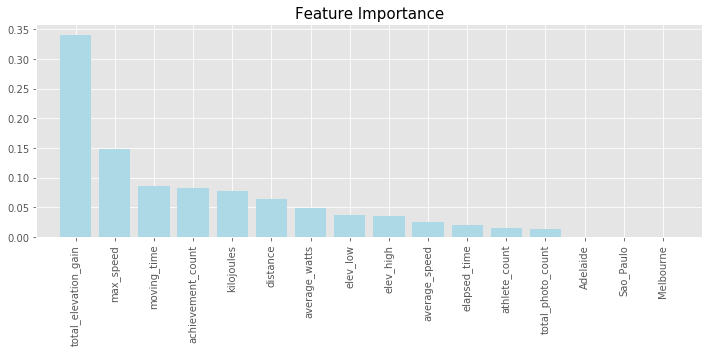

In [153]:
# plotting feature importance
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Feature Importance',fontsize=15)
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()


In [154]:
# list of features in order of importance
feature_importance = [feat_labels[indices[feature]] for feature in range(X_train.shape[1]) ]

In [155]:
feature_importance

['total_elevation_gain',
 'max_speed',
 'moving_time',
 'achievement_count',
 'kilojoules',
 'distance',
 'average_watts',
 'elev_low',
 'elev_high',
 'average_speed',
 'elapsed_time',
 'athlete_count',
 'total_photo_count',
 'Adelaide',
 'Sao_Paulo',
 'Melbourne']

In [156]:
# collecting rmses for training and validation CV from the most import feature to the least important feature

train_rmse_s = []
validation_rmse_s = []
for i in range(len(feature_importance)):
    col = feature_importance[:i+1]
    
    X = ride.loc[:,col].values
    y = ride['kudos_count'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)

    forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
    forest.fit(X_train_std,y_train)

    kudos_predictions_train_forest = forest.predict(X_train_std)
    kudos_predictions_test_forest = forest.predict(X_test_std)
    train_mse = mean_squared_error(y_train,kudos_predictions_train_forest)
    train_rmse = np.sqrt(train_mse)
    train_rmse_s.append(train_rmse)
    scores = cross_val_score(forest, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
    forest_rmse_scores = np.sqrt(-scores)
    validation_rmse = forest_rmse_scores.mean()
    validation_rmse_s.append(validation_rmse)
    
    


Finally lets plot it to visualise

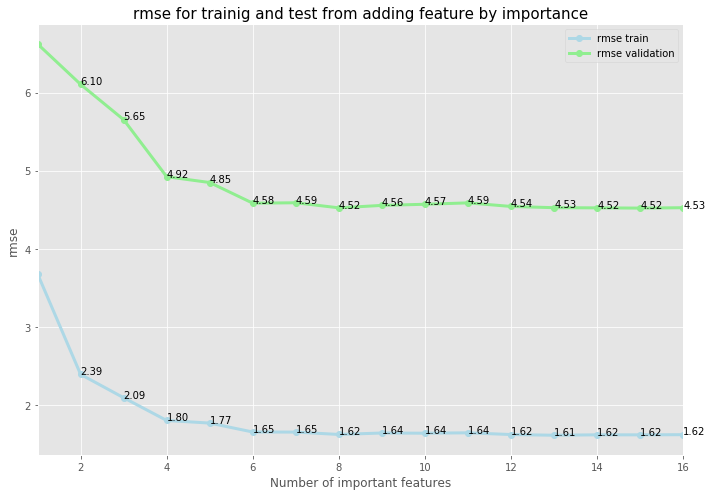

In [157]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,7))
plt.title('rmse for trainig and test from adding feature by importance',fontsize=15)
plt.plot(range(1,len(feature_importance)+1),train_rmse_s,color='lightblue',label='rmse train',lw=3,marker='o')
for i in range(1,len(feature_importance)):
    plt.annotate(f'{train_rmse_s[i]:.2f}',
            xy=(i+1, train_rmse_s[i]), xycoords='data')
plt.plot(range(1,len(feature_importance)+1),validation_rmse_s,color='lightgreen',label='rmse validation',lw=3,marker='o')
for i in range(1,len(feature_importance)):
    plt.annotate(f'{validation_rmse_s[i]:.2f}',
            xy=(i+1, validation_rmse_s[i]), xycoords='data')
plt.xlabel("Number of important features")
plt.ylabel("rmse")
plt.xlim(1,max(range(1,len(feature_importance)+1)))
plt.legend(loc='upper right')
plt.tight_layout()


From the above chart we can observe that after the 8th feature, adding an extra feature it not improving the model performance in validation data, actually it is only getting worse and then flatens out

Finally we will then use only the top 8 most important feature, retrain our model and evaluate rmse and go with the best model for productions

In [160]:
# select top 6 features

top8 = feature_importance[:8]

# pre-process the data

X = ride.loc[:,top8].values
y = ride['kudos_count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Fit model
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train_std,y_train)

# Predict and calculate rmse
kudos_predictions_train_forest = forest.predict(X_train_std)
kudos_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,kudos_predictions_train_forest)
test_mse_forest = mean_squared_error(y_test,kudos_predictions_test_forest)
train_rmse_forest = np.sqrt(train_mse_forest)
test_rmse_forest = np.sqrt(test_mse_forest)
r2_train = r2_score(y_train,kudos_predictions_train_forest)
r2_test = r2_score(y_test,kudos_predictions_test_forest)


print(f'rmse train {train_rmse_forest:.2f}')
print(f'rmse test {test_rmse_forest:.2f}')
print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')


rmse train 1.62
rmse test 4.74
r2 train 0.96
r2 test 0.68


actually performs worse with only 8 features in the test data from 4.63 to 4.74.

One final thing I would like to do it to plot the learning and validation curve to check if we can fix the overfiting issue and if we can get a more regularised model

In [164]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(forest,X_train_std,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)


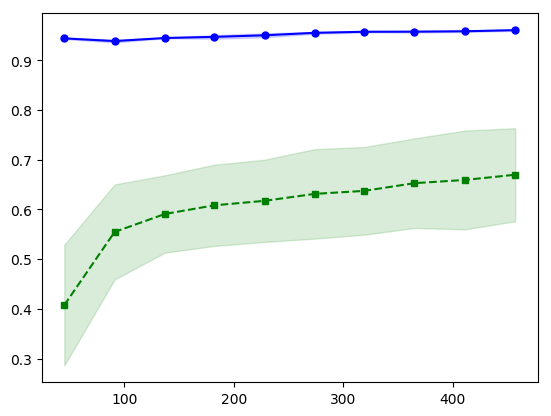

In [181]:
# plot learning curve
plt.style.use('default')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='b',marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='g',marker='s',linestyle='--',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='g')

In [189]:
# plot validation curve
from sklearn.model_selection import validation_curve

param_range = [1,10,200,500,800,1000]
train_scores, test_scores = validation_curve(forest,X_train_std,y_train,param_range=param_range,cv=10, param_name='n_estimators')




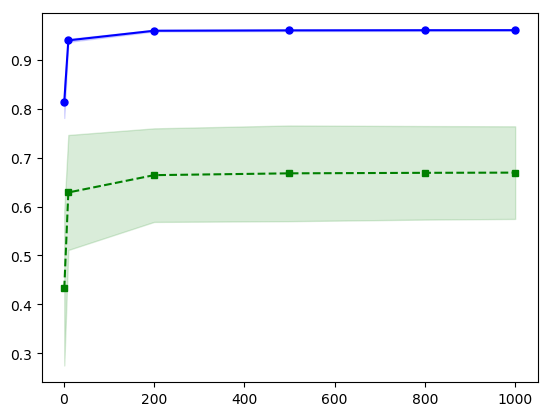

In [190]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range, train_mean, color='b',marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='g',marker='s',linestyle='--',markersize=5, label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='g')


# Conclusion

This exercise was good fun to practive machine learning after studing 2 books the main chapters about Linear Regression, Model Evaluation and Testing

   <ul>
    <li><a href="https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130"> Python Machine Learning</a></li>
    <li><a href="https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_1?crid=222SHRAAS3TX9&keywords=hands+on+machine+learning+with+scikit+learn+and+tensorflow&qid=1564004741&s=books&sprefix=hands+on+macin%2Cstripbooks-intl-ship%2C476&sr=1-1"> Hands-on Machine Leanrning with Skit-Learn & TensorFlow</a></li>
   </ul>

By the way, those are two great books to give you a good foundation in Machine Learning and also to get started

Despite the practice conclusion which was more of a personal note the main conclusions was that the Hyper Parameter tunning did nothing to improve the model.

For this particular model the random forest regressor demostrated to be the best predictior with a margin of erros of ~ 4.6 kudos which I can say is reasonable.

Feature importance did not improve the model and I was not able to reduce overfit by regularisation and playing with the tree parameters. Despite all the attempts the best model for this problem prived to be the Random Forest Regressor compared to all other options tested

   
   

# How can I improve this project

I really enjoyed this project and I learned a lot as it was the most compregensive analysis using python I have ever done. What I can see that can be improved.

    - Use more def() functions and pipeline from sklearn to automate the process with new data
    - Try regularised linear model such as LASSO, Rige and Elastic net and play with parameters
    - Try to solve this with deep learning
   
Any suggestions?

What went wrong?